# Julia 深度學習：可微分程式設計

本範例需要使用到的套件有 Zygote，請在執行以下範例前先安裝。

```
] add Zygote
```

In [1]:
using Pkg
Pkg.add("Zygote")

   Updating registry at `C:\Users\HSI\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `C:\Users\HSI\.julia\environments\v1.4\Project.toml`
  [e88e6eb3] + Zygote v0.4.20
   Updating `C:\Users\HSI\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [13]:
using Plots

In [2]:
using Zygote

┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1260


## 單純函式

In [5]:
f(x) = x^2 + 2x + 1

f (generic function with 1 method)

In [6]:
f(5)

36

`gradient` 是用來求微分值的函式，第一個參數為函式，第二個參數為求微分值的點。

In [56]:
diff_f = gradient.(f, x); 
x = collect(1:0.1:5);
y = map(first, diff_f); # equivalent to first.(diff_f)
# or y = f'.(x)

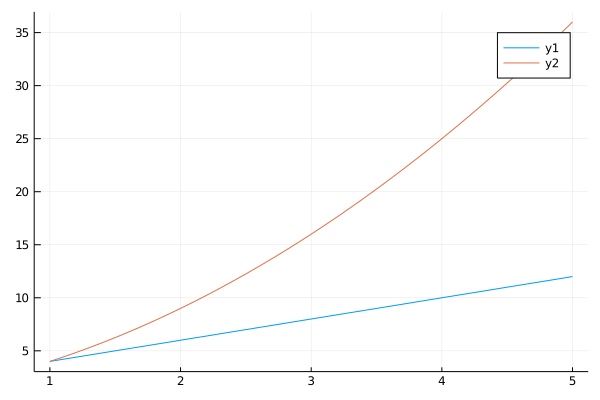

In [46]:
Plots.plot(x,y)
Plots.plot!(x,f.(x))

也可以透過在函式名稱後加上 `'` 來取得微分值，這會比較接近一般數學的寫法。

In [47]:
f'(5)

12

In [48]:
g(x) = sin(x)

g (generic function with 1 method)

In [49]:
g'(π)

-1.0

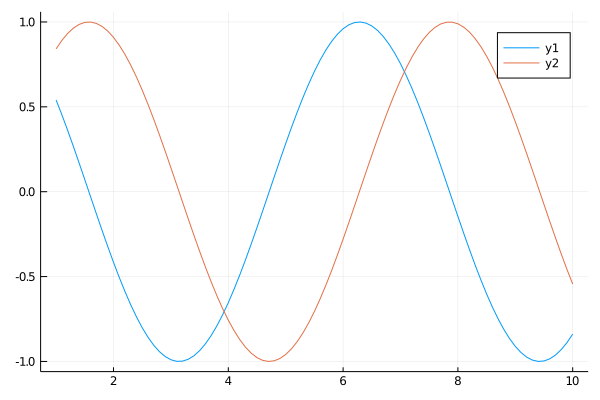

In [58]:
x = collect(1:0.1:10);
Plots.plot(x,g'.(x))
Plots.plot!(x,g.(x))

In [8]:
gradient(log, 2)

(0.5,)

In [9]:
gradient(exp, 2)

(7.38905609893065,)

In [10]:
f(x) = log(1 + exp(5*sin(x) + 5x + 2))

f (generic function with 1 method)

In [11]:
f'(1)

7.701406990501207

## 多參數函式

In [50]:
g(a, b) = a*b

g (generic function with 2 methods)

多參數函式需要同時給予，對應求微分值的點，例如這邊示範兩個參數，就需要給兩個點。這時候它回傳的結果，分別是對第一個參數微分 $\frac{\partial g}{\partial a}$ 及第二個參數微分 $\frac{\partial g}{\partial b}$。

In [13]:
gradient(g, 3, 4)

(4, 3)

## 一般函式的微分

In [51]:
function foo(x, n)
    if n == 0
        return x
    end
    return foo(x*n, n-1)
end

foo (generic function with 1 method)

In [52]:
gradient(x->foo(x, 4), 5)

(24,)

## 察看微分後函式的 LLVM IR

In [16]:
f(x) = 5*sin(x)

f (generic function with 1 method)

In [17]:
@code_llvm f'(π)


;  @ /home/yuehhua/.julia/packages/Zygote/jLxtV/src/compiler/interface.jl:48 within `#38'
define double @"julia_#38_19222"() {
top:
  ret double -5.000000e+00
}


## 對資料結構微分

In [18]:
d = Dict(:a=>sin, :b=>cos)

Dict{Symbol,Function} with 2 entries:
  :a => sin
  :b => cos

In [19]:
gradient(d[:a], 5)

(0.28366218546322625,)

## 對自訂的型別微分

In [20]:
import Base: +, -

struct Point
  x::Float64
  y::Float64
end

In [21]:
+(a::Point, b::Point) = Point(a.x + b.x, a.y + b.y)

+ (generic function with 208 methods)

In [22]:
a = Point(1, 2)
b = Point(3, 4)

Point(3.0, 4.0)

In [23]:
gradient(y->(y+b).x, a)

((x = 1.0, y = nothing),)